# Calculating the Term Structure of Interest Rates Using Forward Equations:

In this module, I will calculate the term structure of interest rates using the forward equations. The forward equations enable us to calculate the prices of elementary securities (also known as Arrow-Debreu securities). An elementary security is a contract that pays 1 unit of a numeraire if a particular state occurs at a particular time in the future and pays zero numeraire in all the other states.

By constructing the forward prices, we can price other derivatives very easily and here we would focus on calculating first the Zero Coupon Bond Prices and then deriving the term structure of interest rates using the forward equations. For details on how the Term Structure is calculated from ZCB prices, see the module ZCB_term_structure. 

The forward equations are defined as follows:

Let $P_{i,j}$ be the time 0 price of a security that pays 1 unit in time $i$ and state $j$ and 0 in all other states.

Then,

$ \large P_{0,0} = 1$

$\large P_{k+1,0} = \frac{1}{2} \frac{P_{k,0}}{1 + r_{k,0}} $

$\large P_{k+1,k+1} = \frac{1}{2} \frac{P_{k,k}}{1 + r_{k,k}} $

$\large P_{k+1,s} = \frac{1}{2} \frac{P_{k,s-1}}{1 + r_{k,s-1}}  + \frac{1}{2} \frac{P_{k,s}}{1 + r_{k,s}}$ if 0 < s < k+1

From the forward equations, the zero coupon bond prices can be calculated using the formula:

$ \large Z_{0}^k = FV \sum_{i=0}^{k+1} P_{k,j}$ where $Z_{0}^k$ is the time 0 price of a ZCB maturing in k periods with FV face value and $P_{k,j}$ are the elementary prices in time k and state j.

So first we will construct the binomial short rate lattice (see earlier modules on how to do this) and then construct a function to calculate the forward equations up to a given period.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

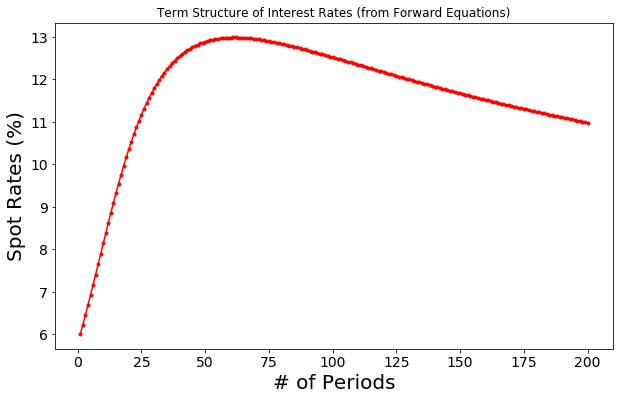

In [30]:
plot_term_structure(6.0,200,1.25,0.9)

In [28]:
def plot_term_structure(r_0,n,u,d):
    
    spot_rates = term_structure(r_0,n,u,d)
    
    maturity = np.arange(1,n+1)
    
    plt.figure(figsize=(10,6))
    
    plt.plot(maturity, spot_rates*100, 'r.-')
    
    plt.ylabel('Spot Rates (%)', size = 20)
    plt.xlabel('# of Periods', size = 20)
    
    plt.tick_params(labelsize = 14)
    
    plt.title('Term Structure of Interest Rates (from Forward Equations)')
    
    return

In [24]:
def term_structure(r_0, n, u, d):
    
    #r_0: the present rate
    #n: number of periods
    #u,d: up and down factor of the short rates
    
    zcb_price_arr = np.zeros(n+1)   #the zcb function is defined below
    
    for i in range(1,n+1):
        zcb_price_arr[i] = zcb_price_forward(i, r_0, u, d)
        
    spot_rates = np.zeros(n+1)
    
    for i in range(1,n+1):
        spot_rates[i] = (100.0/zcb_price_arr[i])**(1/i) - 1.0
           
    return spot_rates[1:]

In [12]:
def zcb_price_forward(k,r_0,u,d,fv=100):
    
    #price of a zero_coupon bond with face value = fv and maturing in k periods using forward equations
    #fv: face value (default 100)
    #k: maturity period
    #r_0: present short rate
    #u,d: up and down factors of the short rate lattice
    
    e_prices = elementary_prices(r_0,k,u,d)
    
    zcb_price = fv*np.sum(e_prices,axis=1)[k]
    
    return zcb_price
    
    

In [3]:
def elementary_prices(r_0,n,u,d):
    
    s = short_rate(r_0,n,u,d)/100.0
    
    e_prices = np.zeros_like(s)
    
    e_prices[0,0] = 1.0
    
    for i in range(1,n+1):            #the 0-th row
        e_prices[i,0] = e_prices[i-1,0]/(2*(1.0 + s[i-1,0]))
        
    for i in range(1,n+1):
        e_prices[i,0] = e_prices[i-1,0]/(2*(1.0 + s[i-1,0]))
        for j in range(1,i+1):
            if i > j:
                e_prices[i,j] = e_prices[i-1,j-1]/(2*(1.0 + s[i-1,j-1])) + e_prices[i-1,j]/(2*(1.0 + s[i-1,j]))
            else:
                e_prices[i,j] = e_prices[i-1,j-1]/(2*(1.0 + s[i-1,j-1]))
                   
    return e_prices    

In [5]:
def short_rate(r_0,n,u,d):
    
    #S_0 = initial stock price
    #n: number of periods
    #u,d = up/down movement in each step
    
    rate = np.zeros((n+1,n+1))
    rate[0,0] = r_0
    
    for i in range(1,n+1):
        rate[i,0] = rate[i-1,0]*d
        for j in range(1,i+1):
            rate[i,j] = rate[i-1,j-1]*u
        
        
    return rate